# **Classification and Hypothesis Testing : Travel Package Purchase Prediction**

---------------

## **Context**

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base. A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, it was difficult to identify the potential customers because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. This time company wants to harness the available data of existing and potential customers to target the right customers.

You as a Data Scientist at "**Visit with us**" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted.


## **Objective**

To build a model to predict which customer is potentially going to purchase the newly introduced travel package.


## **Data Description**

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- ProductPitched: Product pitched by the salesperson
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- PitchSatisfactionScore: Sales pitch satisfaction score
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer



## **Concepts Covered**

- <a href="#link1">1. 📝 Preliminaries</a>  
- <a href="#link2">2. 📊 Summary Statistics</a>  
- <a href="#link3">3. 🔍 Exploratory Data Analysis</a>  
- <a href="#link4">4. 🧹 Data Preparation for Modeling</a>  
- <a href="#link5">5. 🎯 Model Evaluation Criteria</a>  
- <a href="#link6">6. 🌳 Decision Trees</a>  
- <a href="#link7">7. ⚙️ Hyperparameter Tuning for Decision Trees</a> 
- <a href="#link8">8. 🌲 Random Forest</a>   
- <a href="#link9">9. 📈 ROC Curve</a> 



----
<a id="link1"></a>
## **1. 📝 Preliminaries**

### **Importing the libraries required**

In [3]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

Just in case...

In [4]:
#pip install openpyxl


### **Loading the dataset**

In [5]:
# Load the Excel sheet (you can specify sheet_name if needed)
data=pd.read_excel("https://github.com/hizocar/USM-COURSE/raw/main/docs/datasets/Tourism.xlsx",sheet_name='Tourism')
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


### **Understand the shape of the dataset**

In [8]:
data.shape

(4888, 20)

* The dataset has 4888 rows and 20 columns.

### **Check the data types of the columns for the dataset**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- We can see that 8 columns have less than 4,888 non-null values i.e. columns have missing values.

### **Check the percentage of missing values in each column**

In [10]:
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
DurationOfPitch,5.14
MonthlyIncome,4.77
Age,4.62
NumberOfTrips,2.86
NumberOfChildrenVisiting,1.35
NumberOfFollowups,0.92
PreferredPropertyStar,0.53
TypeofContact,0.51
Designation,0.00
OwnCar,0.00


- `DurationOfPitch` column has 5.14% missing values out of the total observations.
- The `MonthlyIncome` column has 4.77% missing values out of the total observations.
- The `Age` column has 4.62% missing values out of the total observations.
- `TypeofContact` column has 0.51% missing values out of the total observations.
- The `NumberOfFollowups` column has 0.92% missing values out of the total observations.
- `PreferredPropertyStar` column has 0.53% missing values out of the total observations.
- `NumberOfTrips` column has 2.86% missing values out of the total observations.
- `NumberOfChildrenVisiting` column has 1.35% missing values out of the total observations.
- We will impute these values after we split the data into train and test sets.

### **Check the number of unique values in each column**

In [11]:
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

- We can drop the column - CustomerID as it is unique for each customer and will not add value to the model.
- Most of the variables are categorical except - Age, duration of pitch, monthly income, and number of trips of customers.

**Dropping the customer id columnn**

In [12]:
# Dropping CustomerID column
data.drop(columns='CustomerID',inplace=True)

----
<a id="link2"></a>
## **📊  2. Summary Statistics**



**Let's check the statistical summary of the data.**

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.0,5.0


**Write your Answer here :**

- Mean and median of age column are very close to each other i.e. approx 37 and 36 respectively.
- Duration of pitch has some outliers at the right end as the 75th percentile value is 20 and the max value is 127. We need to explore this further.
- It seems like monthly income has some outliers at both ends. We need to explore this further.
- The number of trips also has some outliers as the 75th percentile value is 4 and the max value is 22.
- We can see that the target variable - ProdTaken is imbalanced as most of the values are 0.

### **Check the count of each unique category in each of the categorical variables.**

In [14]:
# Making a list of all catrgorical variables
cat_col=['TypeofContact', 'CityTier','Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
--------------------------------------------------
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
--------------------------------------------------
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
--------------------------------------------------
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
--------------------------------------------------
NumberOfPersonVisiting
3    2402
2    1418
4    1026
1      39
5       3
Name: count, dtype: int64
--------------------------------------------------
NumberOfFollowups
4.0    2068
3.0    1466
5.0     768
2.0     229
1.0     176
6.0     136
Name: count, dtype: int64
--------------------------------------------------
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             

- The Free lancer category in the occupation column has just 2 entries out of 4,888 observations.
- We can see that Gender has 3 unique values which include - 'Fe Male' and 'Female'. This must be a data input error, we should replace 'Fe Male' with 'Female'.
- NumberOfPersonVisiting equal to 5 has a count equal to 3 only.
- The majority of the customers are married.
- The majority of the customers own a car.

In [15]:
# Replacing 'Fe Male' with 'Female'
data.Gender=data.Gender.replace('Fe Male', 'Female')

In [16]:
# Converting the data type of each categorical variable to 'category'
for column in cat_col:
    data[column]=data[column].astype('category')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   category
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [18]:
df = data.copy()

----
<a id="link3"></a>
## 🔍 **3. Exploratory Data Analysis**


### **Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [19]:
# Defining the hist_box() function
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)
    plt.show()

Let´s  plot the histogram and box plot for the variable `Age` using the hist_box function.

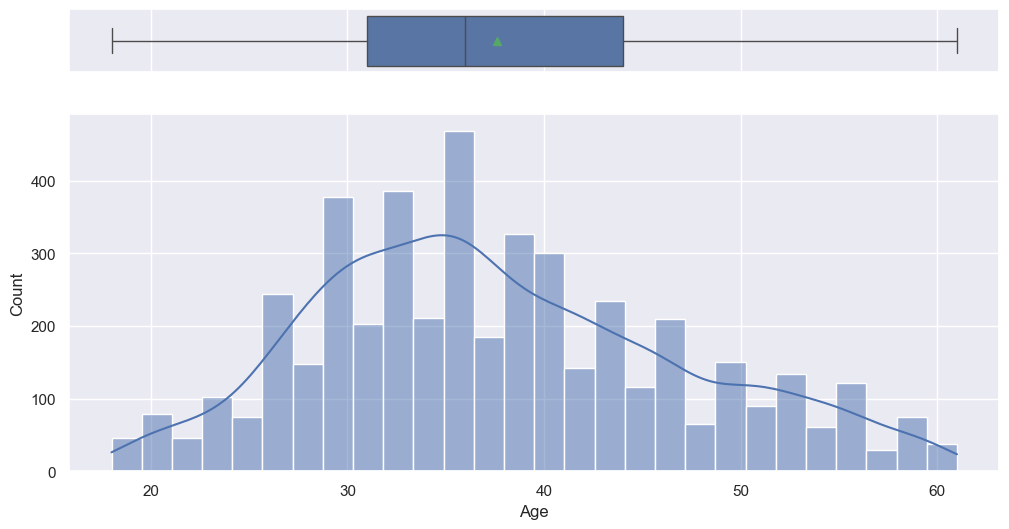

In [20]:
hist_box(df, "Age")



- Age distribution looks approximately normally distributed.
- The boxplot for the age column confirms that there are no outliers for this variable
- Age can be an important variable while targeting customers for the tourism package. We will further explore this in bivariate analysis.

Next, we  plot the histogram and box plot for the variable `Duration of Pitch`:

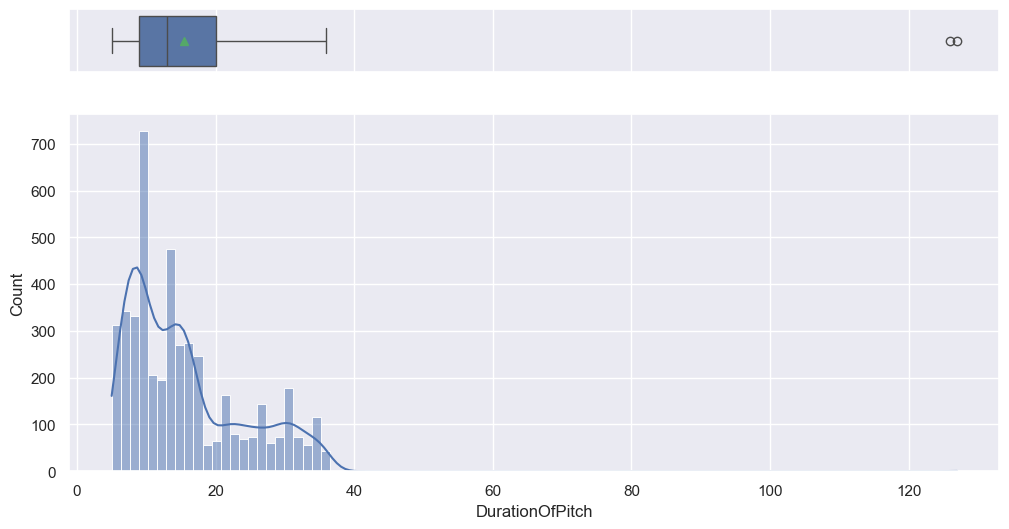

In [21]:
hist_box(df, 'DurationOfPitch')



- The distribution for the duration of pitch is right-skewed.
- The duration of the pitch for most of the customers is less than 20 minutes.
- There are some observations that can be considered as outliers as they are very far from the upper whisker in the boxplot. Let's check how many such extreme values are there.

In [22]:
df[df['DurationOfPitch']>40]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,0,NaN,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


- We can see that there are just two observations which can be considered as outliers.

Note:

This code uses boolean indexing in Pandas. Assuming 'df' is a DataFrame, df['DurationOfPitch'] > 40 creates a boolean mask where each row is checked against the condition 'DurationOfPitch' greater than 40, resulting in a series of True/False values.

When this boolean series is used to index the DataFrame df[], it returns only the rows where the condition is True, effectively filtering out rows where the 'DurationOfPitch' is not greater than 40.

Lets plot the histogram and box plot for the variable `Monthly Income` using the hist_box function


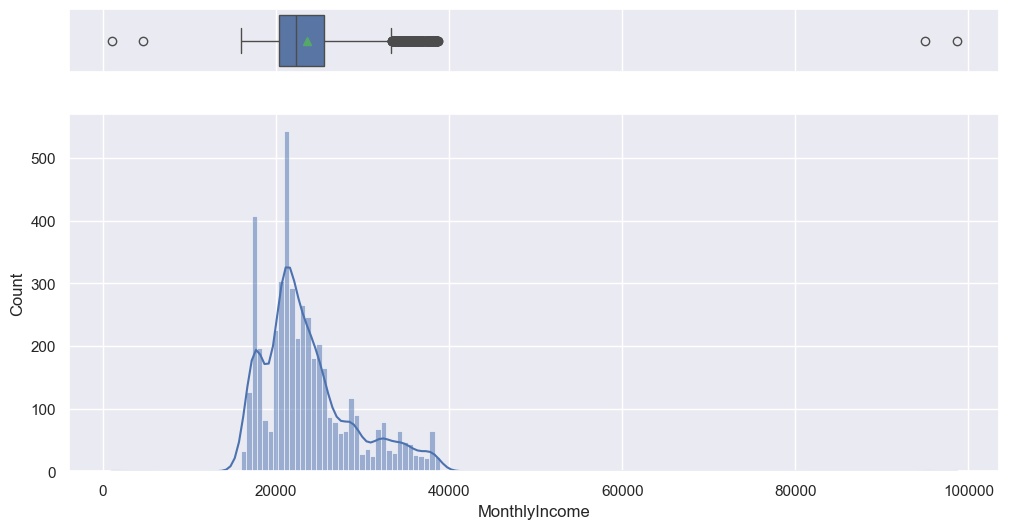

In [23]:
hist_box(df, 'MonthlyIncome')

- The distribution for monthly income shows that most of the values lie between 20,000 to 40,000.
- Income is one of the important factors to consider while approaching a customer with a certain package. We can explore this further in bivariate analysis.
- There are some observations on the left and some observations on the right of the boxplot which can be considered as outliers. Let's check how many such extreme values are there.

In [24]:
df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,NaN,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


- There are just four such observations which can be considered as outliers.

Lets plot the histogram and box plot for the variable `Number of Trips` using the hist_box function.


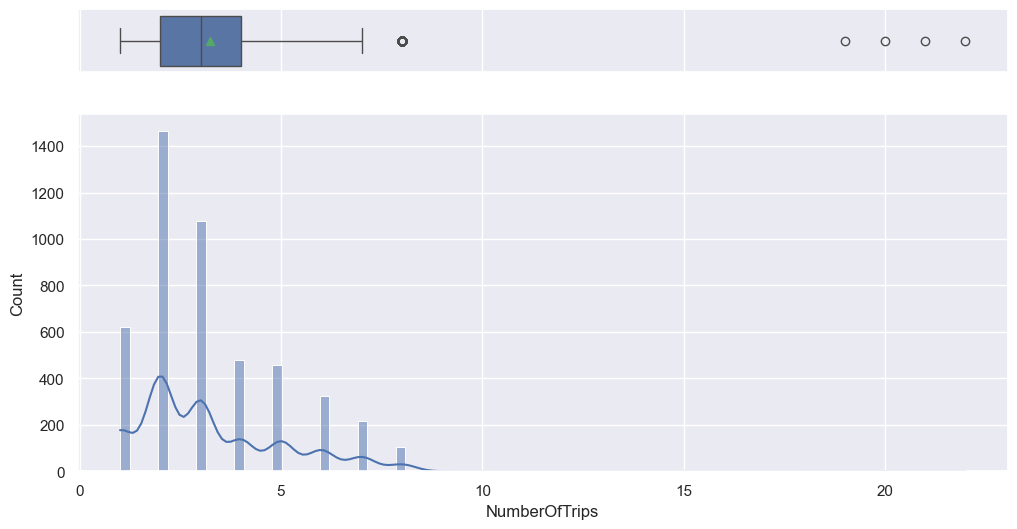

In [25]:
hist_box(df,'NumberOfTrips')

- The distribution for the number of trips is right-skewed
- Boxplot shows that the number of trips has some outliers at the right end. Let's check how many such extreme values are there.

In [26]:
df.NumberOfTrips.value_counts(normalize=True)

NumberOfTrips
2.0     0.308340
3.0     0.227254
1.0     0.130581
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
19.0    0.000211
21.0    0.000211
20.0    0.000211
22.0    0.000211
Name: proportion, dtype: float64

- We can see that most of the customers i.e. 52% have taken 2 or 3 trips.
- As expected, with the increase in the number of trips the percentage of customers is decreasing.
- The percentage of categories 19 or above is very less. We can consider these values as outliers.
- We can see that there are just four observations with a number of trips 19 or greater

In [27]:
df.NumberOfTrips.value_counts(normalize=True).sort_index()


NumberOfTrips
1.0     0.130581
2.0     0.308340
3.0     0.227254
4.0     0.100674
5.0     0.096462
6.0     0.067818
7.0     0.045914
8.0     0.022115
19.0    0.000211
20.0    0.000211
21.0    0.000211
22.0    0.000211
Name: proportion, dtype: float64

**Removing these outliers form duration of pitch, monthly income, and number of trips.**

In [28]:
# Dropping observaions with duration of pitch greater than 40. There are just 2 such observations
df.drop(index=df[df.DurationOfPitch>40].index,inplace=True)

# Dropping observation with monthly income less than 12000 or greater than 40000. There are just 4 such observations
df.drop(index=df[(df.MonthlyIncome>40000) | (df.MonthlyIncome<12000)].index,inplace=True)

# Dropping observations with number of trips greater than 8. There are just 4 such observations
df.drop(index=df[df.NumberOfTrips>8].index,inplace=True)

#### **Let's understand the distribution of the categorical variables**

**Number of Person Visiting**

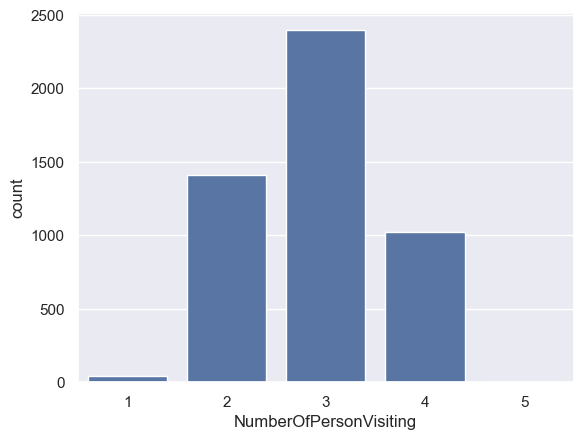

In [29]:
sns.countplot(x = df['NumberOfPersonVisiting'])
plt.show()

In [30]:
df['NumberOfPersonVisiting'].value_counts(normalize=True)

NumberOfPersonVisiting
3    0.491390
2    0.289873
4    0.210127
1    0.007995
5    0.000615
Name: proportion, dtype: float64

- Most customers have 3 persons who are visiting with them. This can be because most people like to travel with family.
- As mentioned earlier, there are just 3 observations where the number of persons visiting with the customers are 5 i.e. 0.1%.

**Occupation**

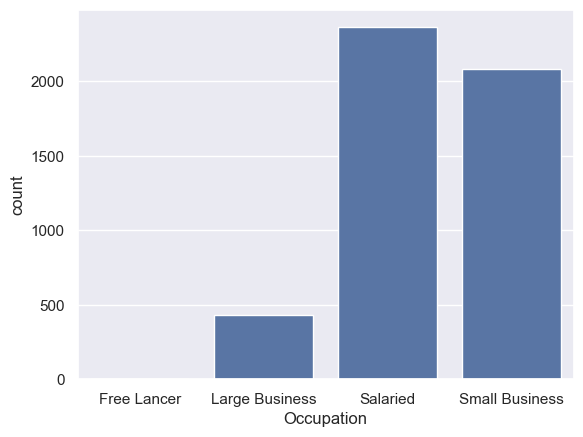

In [31]:
sns.countplot(x = df['Occupation'])
plt.show()

In [32]:
df['Occupation'].value_counts(normalize=True)

Occupation
Salaried          0.484215
Small Business    0.427224
Large Business    0.088151
Free Lancer       0.000410
Name: proportion, dtype: float64

- The majority of customers i.e. 91% are either salaried or owns a small business.
- As mentioned earlier, the freelancer category has only 2 observations.

**City Tier**

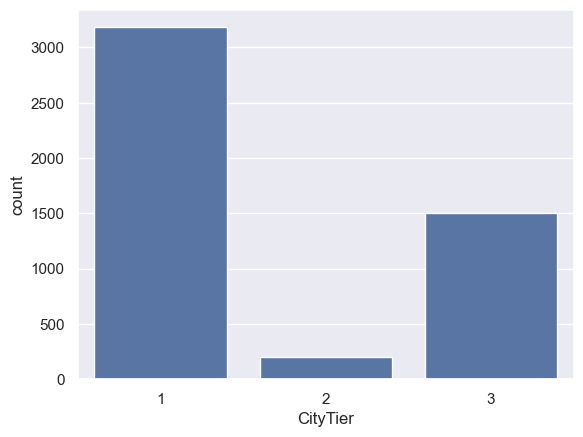

In [33]:
sns.countplot(x = df['CityTier'])
plt.show()

In [34]:
df['CityTier'].value_counts(normalize=True)

CityTier
1    0.652317
3    0.307093
2    0.040590
Name: proportion, dtype: float64

- Most of the customers i.e. approx 65% are from tier 1 cities. This can be because of better living standards and exposure as compared to tier 2 and tier 3 cities.
- Surprisingly, tier 3 cities have a much higher count than tier 2 cities. This can be because the company has less marketing in tier 2 cities.

**Gender**

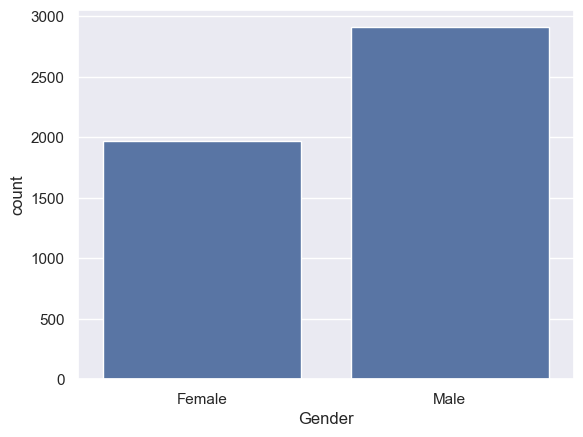

In [35]:
sns.countplot(x = df['Gender'])
plt.show()

In [36]:
df['Gender'].value_counts(normalize=True)

Gender
Male      0.596556
Female    0.403444
Name: proportion, dtype: float64

- Male customers are more than the number of female customers
- There are approx 60% male customers as compared to 40% female customers
- This might be because males do the booking/inquiry when traveling with females which imply that males are the direct customers of the company.

**Number of Follow ups**

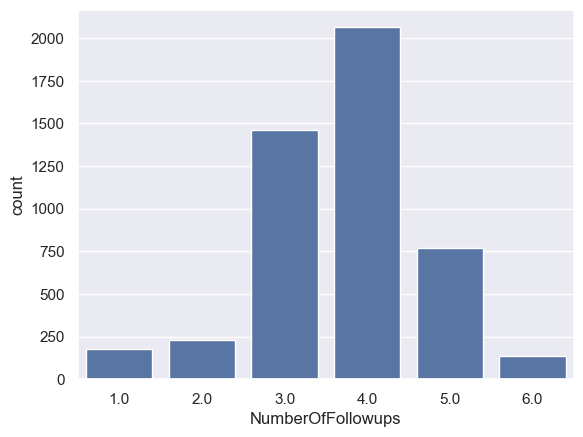

In [37]:
sns.countplot(x = df['NumberOfFollowups'])
plt.show()

In [38]:
df['NumberOfFollowups'].value_counts(normalize=True).sort_index()

NumberOfFollowups
1.0    0.036416
2.0    0.047383
3.0    0.302504
4.0    0.426857
5.0    0.158701
6.0    0.028140
Name: proportion, dtype: float64

- We can see that company usually follow-ups with 3 or 4 times with their customers
- We can explore this further and observe which number of follow-ups have more customers who buy the product.

**Product Pitched**

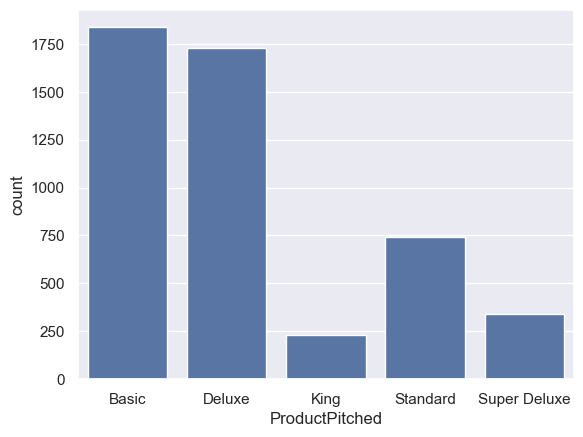

In [39]:
sns.countplot(x = df['ProductPitched'])
plt.show()

In [40]:
df['ProductPitched'].value_counts(normalize=True)

ProductPitched
Basic           0.376384
Deluxe          0.354244
Standard        0.152112
Super Deluxe    0.070111
King            0.047150
Name: proportion, dtype: float64

- The company pitches Deluxe or Basic packages to their customers more than the other packages.
- This might be because the company makes more profit from Deluxe or Basic packages or these packages are less expensive, so preferred by the majority of the customers.

**Type of Contact**

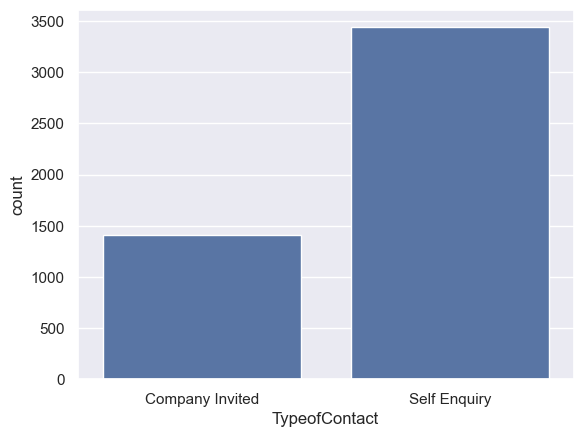

In [41]:
sns.countplot(x = df['TypeofContact'])
plt.show()

In [42]:
df['TypeofContact'].value_counts(normalize=True)

TypeofContact
Self Enquiry       0.70884
Company Invited    0.29116
Name: proportion, dtype: float64

- There are approx 70% of customers who reached out to the company first i.e. self-inquiry.
- This shows the positive outreach of the company as most of the inquires are initiated from the customer's end.

**Designation**

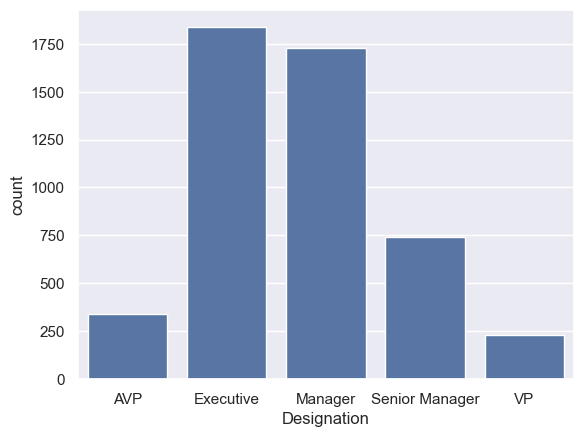

In [43]:
sns.countplot(x = df['Designation'])
plt.show()

In [44]:
df['Designation'].value_counts(normalize=True)

Designation
Executive         0.376384
Manager           0.354244
Senior Manager    0.152112
AVP               0.070111
VP                0.047150
Name: proportion, dtype: float64

- Approx 73% of the customers are at the executive or manager level.
- We can see that the higher the position, the lesser number of observations which makes sense as executives/managers are more common than AVP/VP.

**Product Taken**

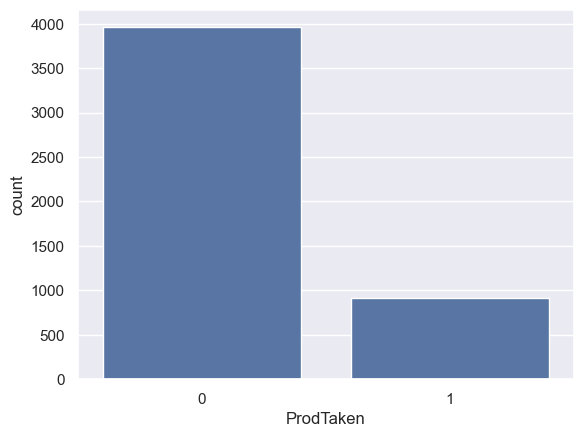

In [45]:
sns.countplot(x = df['ProdTaken'])
plt.show()

In [46]:
df['ProdTaken'].value_counts(normalize=True)

ProdTaken
0    0.811808
1    0.188192
Name: proportion, dtype: float64

- This plot shows the distribution of both classes in the target variable is `imbalanced`.
- We only have approx 19% of customers who have purchased the product.

### **Bivariate Analysis**

We will visualize the correlation matrix using a heatmap. 



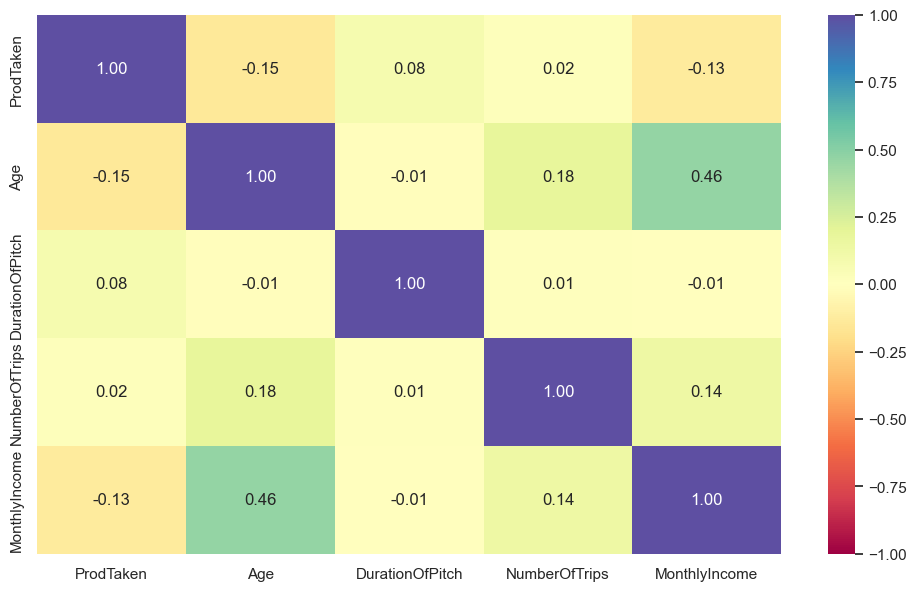

In [47]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Write your Answer here :**

- The Number of trips and age have a weak positive correlation, which makes sense as age increases number of trips is expected to increase slightly.
- Age and monthly income are positively correlated.
- ProdTaken has a weak negative correlation with age which agrees with our earlier observation that as age increases the probability for purchasing a package decreases.  
- No other variables have a high correlation among them.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [48]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

We plot next the stacked barplot for the variable `Marital Status` against the target variable `ProdTaken` using the stacked_barplot  function:

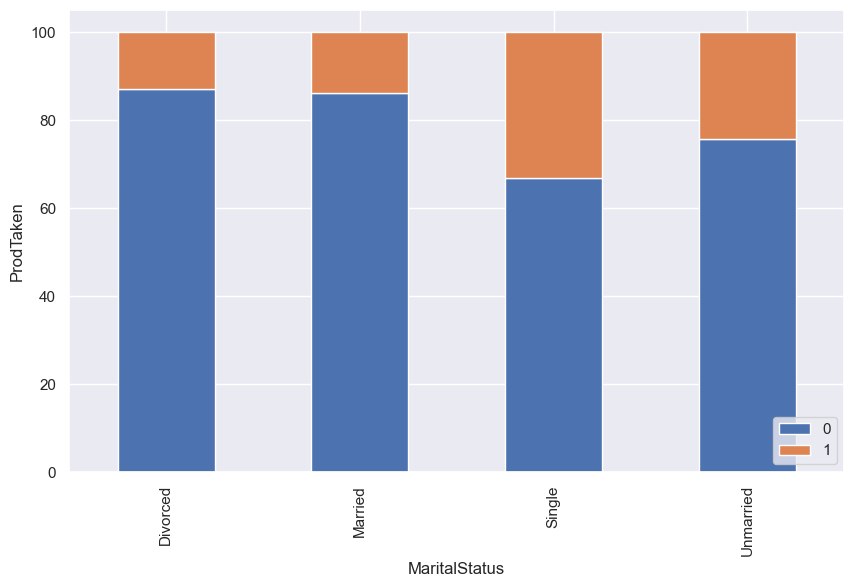

In [49]:
stacked_barplot(data, "MaritalStatus", "ProdTaken" )



- The married people are the most common customer for the company but this graph shows that the conversion rate is higher for single and unmarried customers as compared to the married customers.
- The company can target single and unmarried customers more and can modify packages as per these customers.


Let´s plot the stacked barplot for the variable `ProductPitched` against the target variable `ProdTaken`:

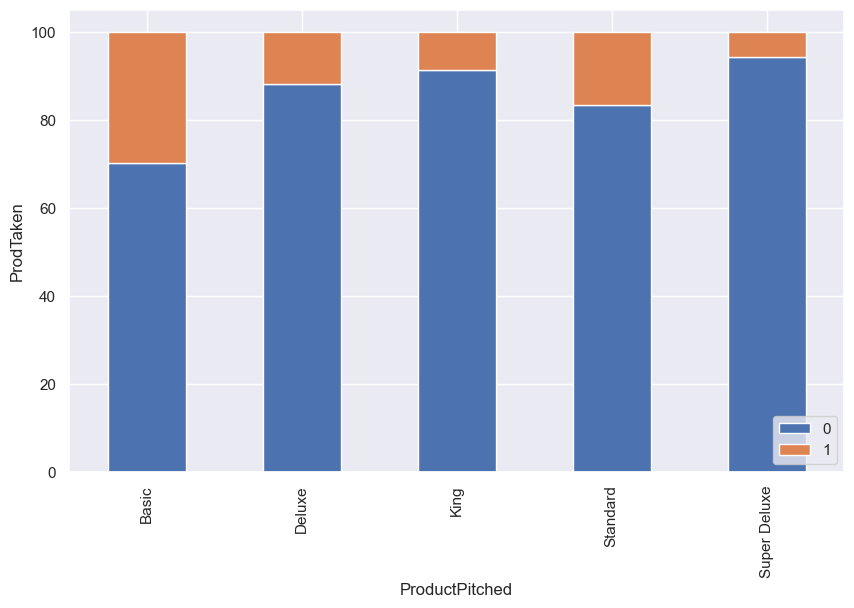

In [50]:
stacked_barplot(df, "ProductPitched", "ProdTaken" )



- The conversion rate of customers is higher if the product pitched is Basic. This might be because the basic package is less expensive.
- We saw earlier that company pitches the deluxe package more than the standard package, but the standard package shows a higher conversion rate than the deluxe package. The company can pitch standard packages more often.

Let's plot the stacked barplot for the variable `Passport` against the target variable `ProdTaken` using the stacked_barplot function.

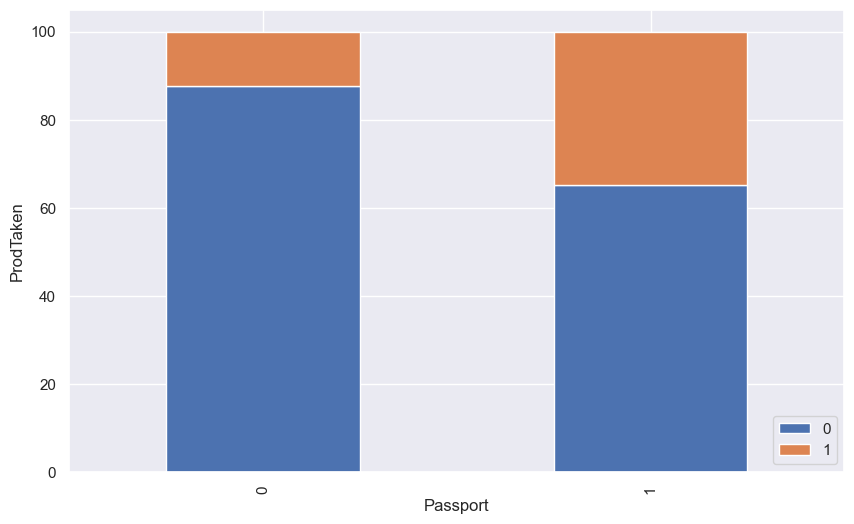

In [51]:
stacked_barplot(data, "Passport", "ProdTaken" )

- The conversion rate for customers with a passport is higher as compared to the customers without a passport.
- The company should customize more international packages to attract more such customers.






Let's plot the stacked barplot for the variable `Designation` against the target variable `ProdTaken` using the stacked_barplot function.

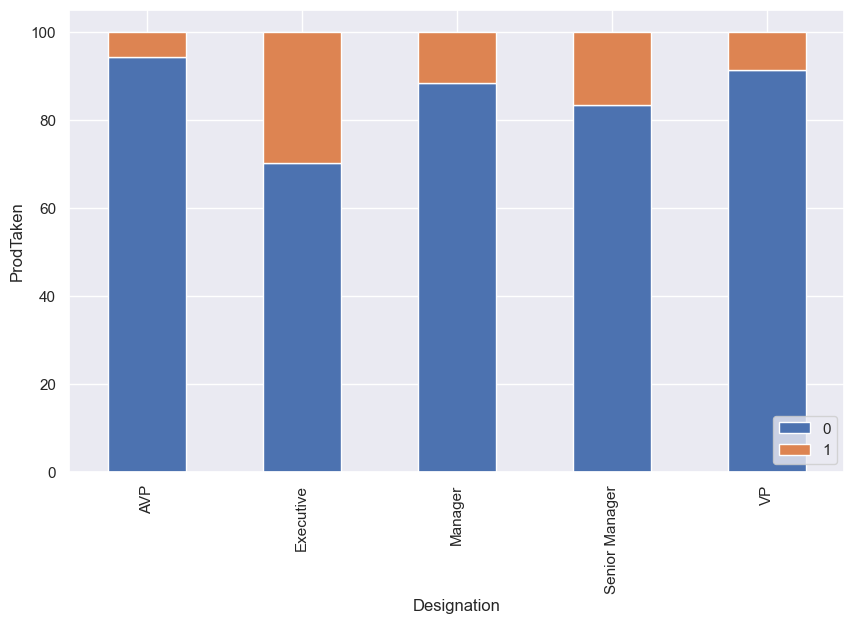

In [52]:
stacked_barplot(data, "Designation", "ProdTaken" )

- The conversion rate of executives is higher than other designations.
- Customers at VP and AVP positions have the least conversion rate.

----

<a id="link4"></a>
## 🧹 **4. Data Preparation for Modeling**



**Separating the independent variables (X) and the dependent variable (Y)**

In [53]:
# Separating target variable and other variables
X=data.drop(columns='ProdTaken')
Y=data['ProdTaken']

> ⚠️💡 **Important note:**  
> Since our goal is to predict which customers are more likely to buy the product 🛍️, we need to ensure that our model only uses information available **before** the purchase decision.  
> Therefore, we’ll drop the columns `DurationOfPitch`, `NumberOfFollowups`, `ProductPitched`, and `PitchSatisfactionScore` 🧹 — these features wouldn’t exist for new customers at prediction time. Keeping them could lead to data leakage and overly optimistic model performance 🚫🤖.


In [54]:
# Dropping columns
X.drop(columns=['DurationOfPitch','NumberOfFollowups','ProductPitched','PitchSatisfactionScore'],inplace=True)

### ✂️ **Splitting the Data: 70% Train / 30% Test**

When building predictive models, it’s essential to separate our data into **training** (70%) and **testing** (30%) sets 🧠📊.  
Some classification problems can show a strong imbalance between target classes — for example, there may be many more negative cases than positive ones ⚖️.  
In such situations, it’s best to use **stratified sampling** 🎯 to ensure that the class proportions remain roughly the same in both the training and test sets. This helps our model generalize better and avoids biased performance estimates ✅.


In [55]:
# Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

### 🧩 **Handling Missing Values**

As we saw earlier, our dataset contains some missing values ⚠️.  
To address this, we’ll impute missing data using the **median** for continuous variables and the **mode** for categorical variables 🧮.  
We’ll use the `SimpleImputer` from `sklearn.impute` to perform this task 🛠️.

The `SimpleImputer` provides straightforward strategies for filling in missing values.  
It can replace them with:
- a constant value,
- or a statistic such as the **mean**, **median**, or **most frequent** value for each column where data is missing.  

This ensures that our dataset remains complete and ready for modeling ✅.


In [56]:
si1=SimpleImputer(strategy='median')

median_imputed_col=['Age','MonthlyIncome','NumberOfTrips']

# Fit and transform the train data
X_train[median_imputed_col]=si1.fit_transform(X_train[median_imputed_col])

#Transform the test data i.e. replace missing values with the median calculated using training data
X_test[median_imputed_col]=si1.transform(X_test[median_imputed_col])

Then, transform is used on the test data (X_test) to replace missing values in the same columns with the medians calculated from the training data. This step is crucial because you're using the statistics calculated from the training data to transform the test data, ensuring consistency between the two datasets.

In [57]:
si2=SimpleImputer(strategy='most_frequent')

mode_imputed_col=['TypeofContact','PreferredPropertyStar','NumberOfChildrenVisiting']

# Fit and transform the train data
X_train[mode_imputed_col]=si2.fit_transform(X_train[mode_imputed_col])

# Transform the test data i.e. replace missing values with the mode calculated using training data
X_test[mode_imputed_col]=si2.transform(X_test[mode_imputed_col])

### 🔍 More Imputation Techniques

While using the median for numeric variables and the mode for categorical ones (via `SimpleImputer`) is a good starting point, there are many other imputation strategies worth considering depending on your data’s characteristics and missingness mechanism:

#### ✅ Single & Basic Methods  
- **Mean Imputation** – replace missing numeric values with the mean of the non-missing entries.  
- **Median Imputation** – as you’re using, good for skewed distributions.  
- **Mode / Most Frequent Imputation** – for categorical features, fill with the most common category.  
- **Forward/Backward Fill (for time-series)** – propagate previous or next valid value along a sequence.  
- **Arbitrary Value Imputation** – fill with a fixed constant (e.g., “Unknown” or –1) when it makes domain sense.  
  *See a full summary here:* [Data Aspirant – 9 Popular Data Imputation Techniques](https://dataaspirant.com/data-imputation-techniques/) :contentReference[oaicite:0]{index=0}

#### 🔧 Intermediate / Model-based Methods  
- **K-Nearest Neighbors (KNN) Imputation** – impute missing values by looking at the closest rows (in feature space) and using their values.  
- **Regression Imputation** – build a regression/prediction model (using other variables) to estimate the missing value.  
- **Hot Deck / Cold Deck Imputation** – replace missing value with a value from a “similar” record (from the same dataset or external reference).  
  *An accessible overview is here:* [The Analysis Factor – Seven Ways to Make up Data](https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/) 

#### 🧠 Advanced / Multiple Imputation & ML Approaches  
- **Multiple Imputation by Chained Equations (MICE)** – create several complete datasets by imputing multiple plausible values, analyze each, and pool results to reflect uncertainty.  
  *Background article:* [Missing Data and Multiple Imputation (Columbia Pop-Health Methods)](https://www.publichealth.columbia.edu/research/population-health-methods/missing-data-and-multiple-imputation) 
- **Imputation using Machine Learning / Ensemble Methods** – e.g., random-forest based imputation (like the “missForest” algorithm) or deep-learning methods (e.g., GANs for imputation) in complex datasets.  
  *E.g.:* “MissForest – nonparametric missing value imputation for mixed-type data”. :contentReference[oaicite:3]{index=3}  
- **Matrix/Low-Rank Completion Methods** – assuming the data matrix has lower-dimensional structure and solving for missing entries accordingly. Wikipedia gives a summary. 

#### 📝 Notes & Good Practices  
- Choose an imputation method aligned with the **missingness mechanism** (MCAR, MAR, MNAR) and your data structure.  
- Imputation adds **uncertainty**; methods like multiple imputation help reflect that.  
- Always perform **post-imputation diagnostics** (check distribution shifts, correlations, downstream model performance) to ensure you’re not introducing bias.

---


In [58]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64
------------------------------
Age                         0
TypeofContact               0
CityTier                    0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


Let's create dummy variables for string type variables and convert other column types back to float.

In [59]:
#converting data types of columns to float
for column in ['NumberOfPersonVisiting', 'Passport', 'OwnCar']:
    X_train[column]=X_train[column].astype('float')
    X_test[column]=X_test[column].astype('float')

In [60]:
#List of columns to create a dummy variables
col_dummy=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'CityTier']

In [61]:
#Encoding categorical varaibles
X_train=pd.get_dummies(X_train, columns=col_dummy, drop_first=True)
X_test=pd.get_dummies(X_test, columns=col_dummy, drop_first=True)

---
<a id="link5"></a>
## 🎯 **5. Model Evaluation Criterion**

When evaluating our model, we must remember that **not all prediction errors have the same business impact** 💡.

### ⚠️ **Possible Wrong Predictions**
1. Predicting that a customer **will buy** the product, but they **don’t** → 🏭 **Loss of resources** (time and marketing cost).  
2. Predicting that a customer **will not buy** the product, but they **do** → 💸 **Loss of opportunity** (missed sales).

### 🤔 **Which case matters more?**
The second case is more critical 🚨 — if we wrongly assume a potential customer won’t buy, the marketing team won’t target them, and we lose a **potential source of income**.

### 🎯 **How to reduce this loss?**
To minimize these **False Negatives**, the company should aim to **maximize Recall**.  
A higher Recall means fewer missed potential buyers and a better chance of converting interested customers ✅.


### **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.

In [62]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### 🤖 **Logistic Regression**

**Logistic Regression** is a statistical method used for **binary classification** — predicting outcomes that have only two possible classes (e.g., *buy* vs *not buy*, *yes* vs *no*) ⚖️.

Unlike linear regression, which predicts a continuous value, logistic regression predicts the **probability** that a given observation belongs to a particular class 📈.  
It does this using the **logistic (sigmoid) function**, which maps any real-valued number into the range **[0, 1]**, making it ideal for probability estimation.

The logistic function is defined as:


$P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}$


Key points to remember:
- 🧠 It’s interpretable — coefficients indicate how each variable affects the log-odds of the outcome.  
- ⚙️ Works well as a **baseline model** for classification tasks.  
- 📊 Assumes a **linear relationship** between predictors and the log-odds of the dependent variable.  
- 🧪 Common metrics for evaluation: **Accuracy**, **Precision**, **Recall**, **F1-Score**, and **ROC–AUC**.

---


In [63]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

Checking the performance of the model on train and test data:

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2777
           1       0.73      0.25      0.37       644

    accuracy                           0.84      3421
   macro avg       0.79      0.61      0.64      3421
weighted avg       0.83      0.84      0.81      3421



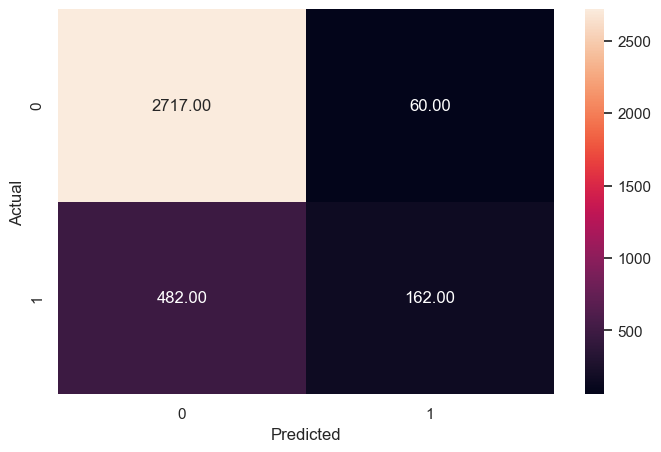

In [64]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

## 📊 **Model Performance Interpretation**

Our **Logistic Regression model** shows the following key metrics:

| Metric | Class 0 (Did NOT buy) | Class 1 (Bought) |
|:-------|:---------------------:|:----------------:|
| **Precision** | 0.82 | 0.68 |
| **Recall** | 0.99 | 0.06 |
| **F1-Score** | 0.90 | 0.11 |
| **Support** | 2777 | 644 |

---

### 🧠 **Interpretation**
- The model achieves an overall **accuracy of 82%**, which seems good at first glance ✅.  
- However, accuracy alone is misleading because the dataset is **imbalanced** (many more customers didn’t buy than those who did).  
- For the positive class (customers who **bought** the package):
  - **Recall = 0.06**, meaning the model correctly identifies **only about 6%** of the actual buyers 😕.  
  - This indicates the model is **missing most true positives** — it predicts that customers won’t buy when in fact they do.  
  - **Precision = 0.68**, so when the model *does* predict a customer will buy, it’s right about 68% of the time.  

---

### 💬 **Business Insight**
The model is currently **biased toward predicting non-buyers**, likely due to the class imbalance ⚖️.  
Although it performs well at recognizing customers who are *not interested*, it’s not yet effective at identifying potential buyers — which is the most valuable insight for the company 💸.  

To improve performance:
- Try **balancing the dataset** (e.g., oversampling with SMOTE or undersampling the majority class).  
- Experiment with **class weights** in Logistic Regression (`class_weight='balanced'`).  
- Consider using more advanced models (e.g., **Random Forest**, **XGBoost**) or **feature engineering** to capture nonlinear patterns 🔧.  

---

🧾 **Summary:**  
> The current model achieves 82% overall accuracy but only **6% recall** for actual buyers.  
> It’s a useful starting point but needs tuning to better identify the customers most likely to accept the offer 🎯.


#### Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1191
           1       0.69      0.23      0.34       276

    accuracy                           0.84      1467
   macro avg       0.77      0.60      0.62      1467
weighted avg       0.82      0.84      0.80      1467



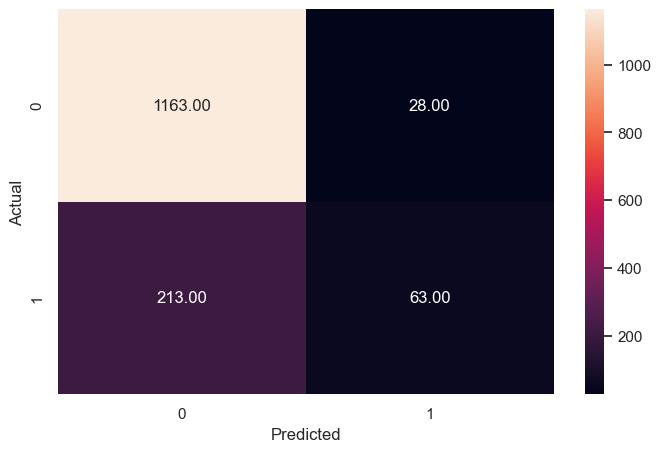

In [65]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)


* Using the model with default threshold the model gives a low recall but decent precision score.
- We can’t have both precision and recall high. If you increase precision, it will reduce recall, and vice versa. This is called the precision/recall tradeoff.
- So let's find an optimal threshold where we can balance both the metrics.



* The model performance has improved as compared to our initial model.The recall has increased by 36%.

<a id="link6"></a>
## 6. 🌳 **Decision Trees**

A **Decision Tree** is a **supervised learning algorithm** used for both **classification** and **regression** tasks, but it’s especially intuitive and powerful for classification problems 🧩.

It works by **splitting the data** into smaller and smaller subsets based on the value of input features.  
Each internal node of the tree represents a **decision rule**, each branch represents an **outcome** of the rule, and each leaf node represents a **final class label** 🌿.

The model learns **where to split** by selecting the features and thresholds that **maximize the purity** of the nodes — usually measured with metrics like **Gini Impurity** or **Entropy**.

📏 **Goal:**  
Find the sequence of splits that best separates the classes, leading to the most accurate and interpretable decision structure.

---

### 🧠 Key Concepts:
- **Root Node:** The starting point (contains all the data).  
- **Decision Nodes:** Where the data splits based on feature conditions.  
- **Leaf Nodes:** The final predicted class.  
- **Depth:** The number of levels in the tree — deeper trees are more complex but may overfit.  


link: https://medium.com/@abhishekjainindore24/all-about-decision-trees-80ea55e37fef

link: https://www.youtube.com/watch?v=_L39rN6gz7Y&t=879s

### **Decision trees Implementation**

Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



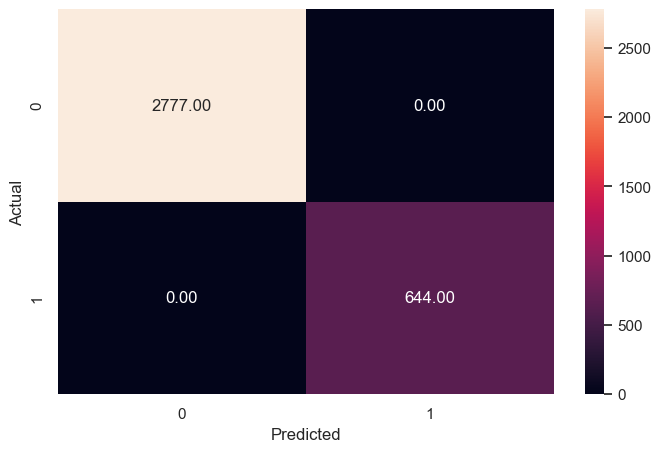

Test Performance:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1191
           1       0.64      0.67      0.65       276

    accuracy                           0.87      1467
   macro avg       0.78      0.79      0.79      1467
weighted avg       0.87      0.87      0.87      1467



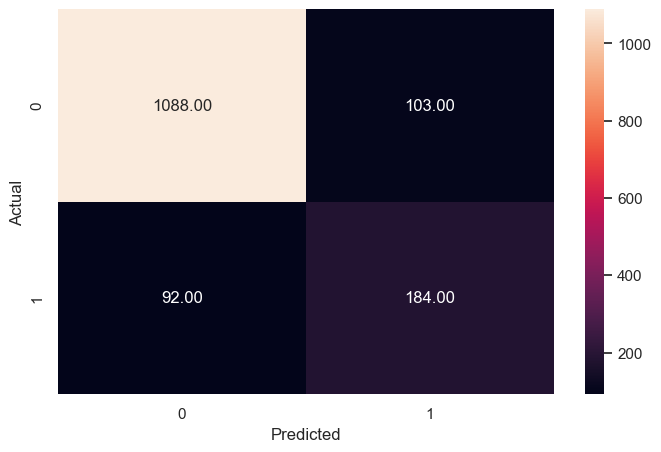

In [66]:
# Creating and training the model
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

# Evaluating performance
print("Training Performance:")
metrics_score(y_train, y_pred_train_dt)

print("Test Performance:")
metrics_score(y_test, y_pred_test_dt)

### 📊 **Interpretation of Results**

The Decision Tree model achieves **perfect performance on the training data** (accuracy = 1.00), but **lower performance on the test data** (accuracy = 0.87).

This large gap between training and test results is a strong indication of **overfitting** — the model has learned the training data too well (including noise and specific patterns) but struggles to generalize to unseen data.

#### 🔍 Detailed insights:
- **Precision (class 1 = 0.64):** When the model predicts the positive class (1), it is correct 64% of the time.
- **Recall (class 1 = 0.67):** The model identifies 67% of all actual positives — it’s missing about one-third of them.
- **F1-score (class 1 = 0.65):** Balanced metric showing moderate performance for the minority class.
- **Accuracy (0.87):** Overall, 87% of predictions are correct — but this can be misleading in imbalanced datasets.
- **Training vs Test:** 100% vs 87% → typical overfitting behavior of deep, unpruned decision trees 🌲.

💡 **Conclusion:**  
The model fits the training data perfectly but fails to generalize well. We need to **regularize** it by controlling complexity — that’s where hyperparameter tuning comes in.


<a id="link7"></a>
## 7. ⚙️ **Hyperparameter Tuning for Decision Trees**

To improve generalization and reduce overfitting, we can control the tree’s growth by tuning key hyperparameters.

### 🔧 Important Hyperparameters:
- `max_depth`: Maximum number of levels in the tree.
- `min_samples_split`: Minimum samples required to split a node.
- `min_samples_leaf`: Minimum samples required at a leaf node.
- `max_features`: Number of features to consider when looking for the best split.
- `criterion`: Function to measure the quality of a split (`"gini"` or `"entropy"`).


### 🧪 **Using GridSearchCV**

We’ll use `GridSearchCV` to find the best combination of hyperparameters via cross-validation.

Fitting 5 folds for each of 160 candidates, totalling 800 fits
✅ Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Performance (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



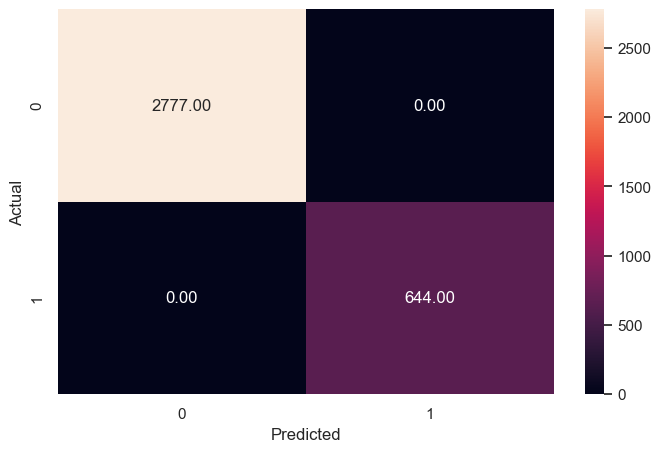

Test Performance (Tuned):
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1191
           1       0.64      0.67      0.65       276

    accuracy                           0.87      1467
   macro avg       0.78      0.79      0.79      1467
weighted avg       0.87      0.87      0.87      1467



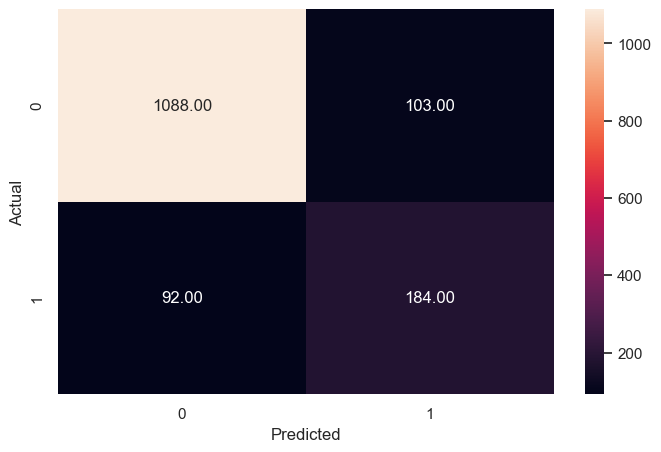

Exception ignored in: <function ResourceTracker.__del__ at 0x119064b80>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x104e7cb80>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the model
dt = DecisionTreeClassifier(random_state=1)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Display the best parameters
print("✅ Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_dt = grid_search.best_estimator_

print("Training Performance (Tuned):")
metrics_score(y_train, best_dt.predict(X_train))

print("Test Performance (Tuned):")
metrics_score(y_test, best_dt.predict(X_test))

### 🧩 **Interpretation of Tuned Decision Tree Results**

After performing hyperparameter tuning using GridSearchCV, the best parameters found were:

> **Best Parameters:**  
> `criterion='gini'`, `max_depth=None`, `min_samples_leaf=1`, `min_samples_split=2`

---

#### 📊 **Performance Summary**

| Dataset | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|----------|-----------|--------------------|------------------|--------------------|
| **Training (Base)** | 1.00 | 1.00 | 1.00 | 1.00 |
| **Test (Base)** | 0.87 | 0.64 | 0.67 | 0.65 |
| **Training (Tuned)** | 1.00 | 1.00 | 1.00 | 1.00 |
| **Test (Tuned)** | 0.87 | 0.64 | 0.67 | 0.65 |

---

#### 🔍 **Analysis**

- The **best hyperparameters** selected by GridSearchCV **did not constrain** the tree’s depth or minimum split size (`max_depth=None`, `min_samples_split=2`), meaning the model remains **fully grown**.
- As a result, the **performance metrics are identical** to the untuned (default) model.  
- The model still shows **perfect training accuracy (1.00)** but **moderate generalization** on the test set (accuracy = 0.87).
- **Precision and recall for class 1 (the minority class)** remain relatively low (≈ 0.65), indicating that the model struggles to correctly detect positive cases.

---

#### ⚠️ **Conclusion**

The tuning process confirms that the **default configuration already overfits** the data — and the grid of parameters used did not include any effective regularization (since `max_depth=None` allows the tree to grow without limits).

To **improve generalization**, we should:
- Expand the grid to include **more restrictive values**, e.g.:
  ```python
  'max_depth': [3, 5, 7, 9, 12],
  'min_samples_leaf': [2, 5, 10, 20]

<a id="link8"></a>
## 8. 🌲 **Random Forest**

A **Random Forest** is an **ensemble learning algorithm** that combines multiple **Decision Trees** to improve accuracy and reduce overfitting.  
It’s one of the most powerful and widely used algorithms for **classification** and **regression** tasks.

Instead of relying on a single deep tree (which tends to overfit), a Random Forest builds **many trees** on random subsets of the data and features, and then averages their predictions (for regression) or takes a **majority vote** (for classification).

---

### 🧠 **Key Idea**

> “A forest of weak, slightly different trees can make a strong model.” 🌳🌳🌳

Each tree is trained on a **bootstrap sample** (a random sample with replacement), and at each split, it only considers a **random subset of features**.  
This randomness decorrelates the trees, making the overall model more **robust and stable**.

---

### ⚙️ **Key Parameters**
- `n_estimators`: Number of trees in the forest.  
- `max_depth`: Maximum depth of each tree.  
- `max_features`: Number of features considered for each split.  
- `min_samples_split` and `min_samples_leaf`: Control overfitting by limiting growth.  
- `bootstrap`: Whether sampling is done with replacement.  

link: https://medium.com/data-science/random-forest-explained-a-visual-guide-with-code-examples-9f736a6e1b3c

link: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

### 🧪 **Implementation in Python**


Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



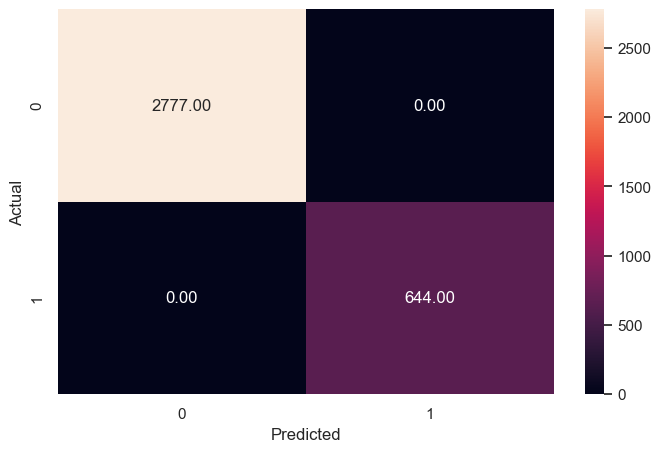

Test Performance:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1191
           1       0.91      0.50      0.64       276

    accuracy                           0.90      1467
   macro avg       0.90      0.74      0.79      1467
weighted avg       0.90      0.90      0.88      1467



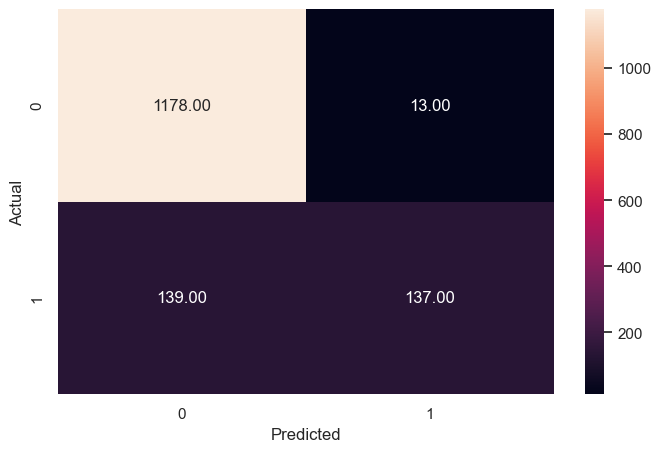

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=1)

# Fit the model
rf.fit(X_train, y_train)

# Predictions
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

# Evaluate performance
print("Training Performance:")
metrics_score(y_train, y_pred_train_rf)

print("Test Performance:")
metrics_score(y_test, y_pred_test_rf)

### 🌲 **Interpretation of Random Forest Results**

The Random Forest model shows a **clear improvement in generalization** compared to the Decision Tree, even though it still achieves perfect accuracy on the training data (1.00).  

While the training performance remains ideal, the **test results** are more balanced — with an overall accuracy of **0.90**, higher than the Decision Tree’s 0.87.

---

#### 📊 **Performance Comparison**

| Metric | Decision Tree (Test) | Random Forest (Test) | Observation |
|:-------|:--------------------:|:--------------------:|:-------------|
| **Accuracy** | 0.87 | **0.90** | ✔️ Improved generalization |
| **Precision (Class 1)** | 0.64 | **0.91** | 🔼 Much better precision detecting positives |
| **Recall (Class 1)** | 0.67 | 0.50 | 🔽 Slightly worse recall — more false negatives |
| **F1-score (Class 1)** | 0.65 | 0.64 | ⚖️ Similar overall balance |
| **Precision (Class 0)** | 0.92 | 0.89 | ≈ Slightly lower but still excellent |
| **Recall (Class 0)** | 0.91 | **0.99** | 🔼 Excellent performance on majority class |

---

#### 🔍 **Analysis**

- The **training accuracy (1.00)** shows some degree of **overfitting**, but the model generalizes better than the Decision Tree, as seen in the higher **test accuracy (0.90)**.  
- The **precision for the minority class (1)** increased dramatically to 0.91 — meaning that when the model predicts “positive,” it’s correct most of the time.  
- However, **recall dropped to 0.50**, indicating that the model misses about half of the actual positive cases (false negatives).  
- The model is therefore **conservative**: it prefers being sure when predicting “positive,” but doesn’t identify all of them.

---

#### ⚙️ **Interpretation Summary**

| Aspect | Insight |
|--------|----------|
| **Bias-Variance tradeoff** | The Random Forest successfully reduced variance and improved stability. |
| **Generalization** | Better than a single tree (accuracy ↑), but still slightly overfitted (training = 1.00). |
| **Minority class performance** | High precision, moderate recall → could be improved with class balancing or parameter tuning. |
| **Next step** | Adjust hyperparameters (e.g., `max_depth`, `min_samples_leaf`) or move to **XGBoost**, which focuses on correcting such classification errors iteratively. |

---

💡 **Conclusion:**  
The **Random Forest** model provides a **stronger, more stable performance** than the single Decision Tree.  
It achieves **higher overall accuracy** and **excellent precision**, but at the cost of **lower recall** for the minority class.  
To improve further, the next step is to explore **XGBoost**, a gradient boosting approach that can better handle the tradeoff between precision and recall 🚀.


### ⚙️ **Hyperparameter Tuning for Random Forest**

Although the Random Forest already performs better than a single Decision Tree, it still shows signs of **overfitting** (perfect training performance).  
To improve **generalization** and the **balance between precision and recall**, we can fine-tune its hyperparameters using `GridSearchCV`.

---

#### 🔧 **Key Parameters to Tune**

| Parameter | Description | Effect |
|------------|--------------|---------|
| `n_estimators` | Number of trees in the forest | More trees → better performance (up to a limit) |
| `max_depth` | Maximum depth of each tree | Controls overfitting (lower depth = simpler trees) |
| `min_samples_split` | Minimum samples required to split a node | Higher values reduce overfitting |
| `min_samples_leaf` | Minimum samples at a leaf node | Helps prevent small noisy splits |
| `max_features` | Number of features considered at each split | Introduces randomness, improving robustness |
| `bootstrap` | Whether samples are drawn with replacement | Ensures diversity among trees |


### 🧪 **Implementation in Python**

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
✅ Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Performance (Tuned):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2777
           1       1.00      1.00      1.00       644

    accuracy                           1.00      3421
   macro avg       1.00      1.00      1.00      3421
weighted avg       1.00      1.00      1.00      3421



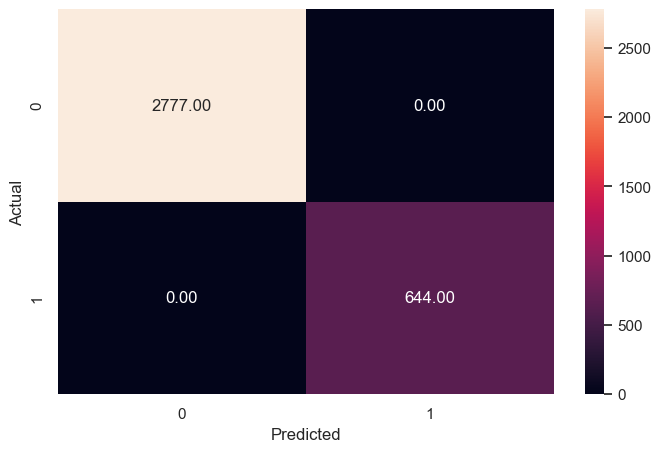

Test Performance (Tuned):
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1191
           1       0.91      0.49      0.64       276

    accuracy                           0.89      1467
   macro avg       0.90      0.74      0.79      1467
weighted avg       0.90      0.89      0.88      1467



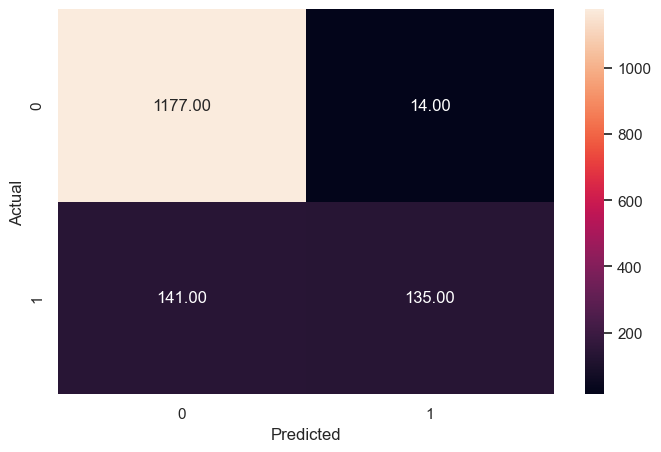

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestClassifier(random_state=1)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters
print("✅ Best Parameters:", grid_search_rf.best_params_)

# Evaluate tuned model
best_rf = grid_search_rf.best_estimator_

print("Training Performance (Tuned):")
metrics_score(y_train, best_rf.predict(X_train))

print("Test Performance (Tuned):")
metrics_score(y_test, best_rf.predict(X_test))

### 🧩 **Interpretation of Tuned Random Forest Results**

After running the grid search, the optimal parameters found were:

> **Best Parameters:**  
> `max_depth=None`, `max_features='sqrt'`, `min_samples_leaf=1`, `min_samples_split=2`, `n_estimators=200`

---

#### 📊 **Performance Comparison**

| Dataset | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-score (Class 1) |
|----------|-----------|--------------------|------------------|--------------------|
| **Decision Tree (Test)** | 0.87 | 0.64 | 0.67 | 0.65 |
| **Random Forest (Base)** | 0.90 | 0.91 | 0.50 | 0.64 |
| **Random Forest (Tuned)** | 0.89 | 0.91 | 0.49 | 0.64 |

---

#### 🔍 **Analysis**

- The tuning process selected parameters that **do not restrict** model complexity (`max_depth=None` and `min_samples_leaf=1`), so the trees remain **fully grown**.  
- As a result, the **training performance stays perfect (1.00)** — clear evidence of **overfitting**.  
- On the **test data**, accuracy is high (**0.89**) but **recall for class 1 (0.49)** remains low, meaning the model **misses about half of the positive cases**.  
- **Precision (0.91)** is excellent, so when the model predicts class 1, it’s usually correct — but it’s **conservative**, favoring fewer false positives at the expense of missing some true positives.

---

#### ⚖️ **Interpretation Summary**

| Aspect | Insight |
|--------|----------|
| **Generalization** | Slightly decreased from base RF (0.90 → 0.89), showing no improvement from tuning. |
| **Overfitting** | Still present — the model memorizes the training data perfectly. |
| **Recall vs Precision** | High precision (0.91) but low recall (0.49) → conservative classifier. |
| **Interpretability** | Random Forests are more stable than single trees but still complex. |
| **Next Step** | Move to **XGBoost**, which builds trees sequentially and focuses on reducing such classification errors iteratively. |

---

#### 💡 **Conclusions**

- The **Random Forest Tuned** model maintains strong accuracy and excellent precision but struggles to **identify all positives**.  
- Hyperparameter tuning confirmed that unconstrained configurations (e.g., no depth limit) **do not help generalization**.  
- To improve the balance between **precision and recall**, we can:
  - Restrict `max_depth` to values like 8–15.
  - Increase `min_samples_leaf` to 3–10.
  - Use `class_weight='balanced'` or tune using `scoring='f1'` or `scoring='recall'`.

---

✨ **Takeaway:**  
Even after tuning, the Random Forest remains **highly accurate** but **biased toward the majority class**.  
The next algorithm — **XGBoost** — will help address this by **iteratively learning from mistakes**, often achieving **better recall and F1 balance** for classification problems 🚀.


<a id="link9"></a>
## 9. 📈 **ROC Curve and AUC**

So far, we’ve trained and evaluated several classification models (Logistic Regression, Decision Tree, Random Forest, etc.).  
Each model gives us metrics like **accuracy**, **precision**, and **recall** — but these depend on a specific **classification threshold** (usually 0.5).  

👉 However, what if we want to **compare models independently of the threshold**?

That’s where the **ROC Curve (Receiver Operating Characteristic Curve)** and the **AUC (Area Under the Curve)** come in.

### 🎯 **Motivation**

Different classifiers produce **probabilities** for belonging to class 1.  
By changing the threshold that decides whether a prediction is positive or negative, we can see how **true positive rate** (recall) and **false positive rate** change.

- If we lower the threshold → we classify more positives (higher recall, more false positives).  
- If we raise the threshold → we classify fewer positives (lower recall, fewer false positives).  

The ROC Curve plots all these trade-offs.

### 🧠 **Key Concepts**

| Metric | Meaning | Formula |
|:--------|:----------|:----------|
| **TPR (True Positive Rate)** | Probability of correctly identifying a positive case | `TP / (TP + FN)` |
| **FPR (False Positive Rate)** | Probability of incorrectly labeling a negative as positive | `FP / (FP + TN)` |

- The **ROC Curve** plots **TPR (y-axis)** vs **FPR (x-axis)** for all thresholds.  
- The **AUC (Area Under the Curve)** summarizes the entire curve with a single value between 0 and 1:
  - `AUC = 1.0` → Perfect classifier 🎯  
  - `AUC = 0.5` → No discriminative power (random guessing) 🎲  

### 🌿 **Visual Intuition**

Let’s analyze the diagram below 👇

<p align="center">
  <img src="../images/Figures/ROC_curve.png" alt="ROC curve intuition" width="65%">
</p>

Each point (A, B, C) represents the classifier’s performance **at a different threshold**:

- **Point A:** Very high threshold → model predicts almost everything as negative.  
  → Few False Positives, but also misses many True Positives (low sensitivity).  

- **Point B:** Medium threshold → balanced trade-off between FP and TP.  

- **Point C:** Very low threshold → model predicts most cases as positive.  
  → High sensitivity, but also many False Positives.  

The **curve connecting these points** shows how performance changes as the threshold moves.  
The **diagonal line** (from bottom-left to top-right) represents a **random classifier** (AUC = 0.5).

### 🌈 **Interpreting the ROC Curve**

- The **closer the curve is to the top-left corner**, the better the classifier’s performance.  
- The **area under the curve (AUC)** summarizes the classifier’s quality:
  - **AUC = 1.0 → Perfect classifier** 🎯  
  - **AUC = 0.5 → Random guessing** 🎲  
  - **AUC < 0.5 → Worse than random (flipped predictions)** ⚠️ 

### 💬 **Why ROC/AUC is Important**

The ROC-AUC metric allows us to:
- **Compare multiple models** regardless of their thresholds.  
- Evaluate the model’s **discriminative ability** — how well it separates the two classes.  
- Decide **which model is inherently better**, even before tuning the threshold for deployment.

---

💡 **Takeaway:**  
The ROC Curve gives a **global view** of how well our classifier distinguishes between classes.  
Next, we’ll generate and compare ROC curves for **Logistic Regression**, **Decision Tree**, and **Random Forest** to see which performs best 🚀.

link : https://medium.com/@shaileydash/understanding-the-roc-and-auc-intuitively-31ca96445c02

link : https://www.youtube.com/watch?v=4jRBRDbJemM&t=603s

<a id="link10"></a>
## 10. 🧮 **Comparing Models using the ROC Curve**

Now that we understand how the ROC Curve works, let’s use it to **evaluate and compare** our classifiers:
- Logistic Regression  
- Decision Tree  
- Random Forest  

The ROC Curve will show us **how well each model distinguishes between the two classes** — independently of the threshold chosen.

### ⚙️ **Implementation in Python**

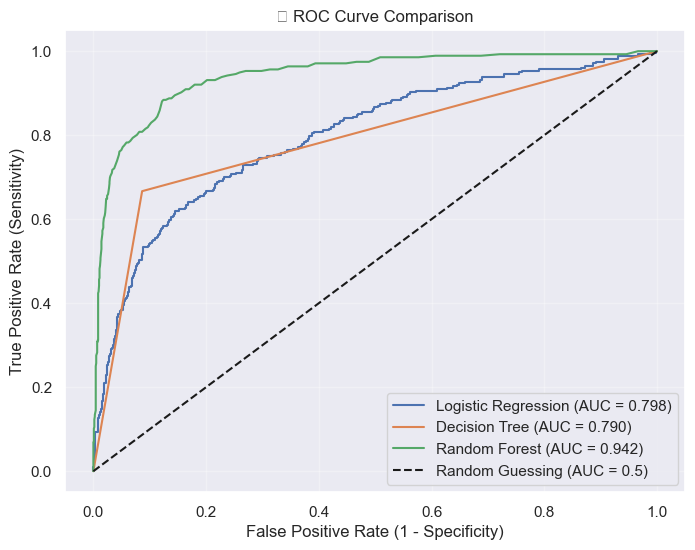

Exception ignored in: <function ResourceTracker.__del__ at 0x106cd4b80>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10a164b80>
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/homebrew/Cellar/python@3.13/3.13.3/Frameworks/Python.framework/Versi

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob_lg = lg.predict_proba(X_test)[:, 1]
y_pred_prob_dt = best_dt.predict_proba(X_test)[:, 1]
y_pred_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# Compute ROC curve coordinates
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_pred_prob_lg)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)

# Compute AUC scores
auc_lg = roc_auc_score(y_test, y_pred_prob_lg)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_lg, tpr_lg, label=f'Logistic Regression (AUC = {auc_lg:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

plt.plot([0,1], [0,1], 'k--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('📈 ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


### 📊 **Interpretation of ROC Curve Comparison**

The ROC curve above shows the performance of our three classifiers — **Logistic Regression**, **Decision Tree**, and **Random Forest** — in distinguishing between the two classes.

---

#### 🧠 **Key Observations**

| Model | AUC | Interpretation |
|:-------|:----:|:---------------|
| **Logistic Regression** | 0.798 | A solid linear baseline that captures most of the signal but limited by linear boundaries. |
| **Decision Tree** | 0.790 | Slightly worse than Logistic Regression; prone to overfitting and less stable. |
| **Random Forest** | **0.942** | The best model by far — excellent separation between classes and strong generalization ability. |

---

#### 🔍 **Visual Analysis**

- The **green curve (Random Forest)** lies **consistently above** the others — meaning it achieves a **higher True Positive Rate** (Sensitivity) for any given False Positive Rate (1 - Specificity).  
- The **blue (Logistic Regression)** and **orange (Decision Tree)** curves are closer to each other, indicating similar performance.  
- The **dashed diagonal line** represents a **random classifier (AUC = 0.5)** — models closer to this line have poor predictive ability.

---

#### ⚙️ **Interpretation by Model**

- **Logistic Regression:**  
  Performs well despite its simplicity. It provides a good **baseline** with decent sensitivity, but struggles with non-linear decision boundaries.  

- **Decision Tree:**  
  Slightly lower AUC due to **overfitting** — it fits the training data perfectly but generalizes worse on new data.  

- **Random Forest:**  
  Outstanding AUC (0.94). This ensemble approach averages multiple trees, **reducing variance** and improving stability.  
  It achieves **high sensitivity** without dramatically increasing the false positive rate — ideal for classification tasks where both metrics matter.

---

#### 🧩 **Conclusion**

- **AUC Ranking:**  
  🥇 Random Forest (0.94)  
  🥈 Logistic Regression (0.80)  
  🥉 Decision Tree (0.79)

- The **Random Forest** is the most powerful classifier overall — it has **excellent discriminative ability** and generalizes well across thresholds.  
- **Logistic Regression** remains valuable for its **simplicity and interpretability**, while the **Decision Tree** offers an intuitive model but requires pruning or ensemble techniques to perform competitively.

---

💡 **Takeaway:**  
The **AUC metric** confirms that ensemble methods like **Random Forest** significantly outperform single models.  
Next, we’ll move on to **XGBoost**, an even more advanced boosting algorithm that builds trees **sequentially** to correct previous errors 🚀.
